# Culinary Recommendation System: 
### A Decision Tree Approach to Food Item Similarity Analysis
### Project by [Razi Haider](https://www.linkedin.com/in/razi-h/)


In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [5]:
mcDf = pd.read_csv('mcdonalds.csv')

In [10]:
mcDf

,restaurant,item,calories,cal_fat,total_fat,sat_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,95,1110,44,3,11,37,4,20,20
1,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,155,1940,62,2,18,55,6,25,20
2,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,120,1980,81,4,18,46,6,20,20
3,Mcdonalds,Big Mac,540,250,28,10.0,80,950,46,3,9,25,10,2,15
4,Mcdonalds,Cheeseburger,300,100,12,5.0,40,680,33,2,7,15,10,2,10
5,Mcdonalds,Classic Chicken Sandwich,510,210,24,4.0,65,1040,49,3,6,25,0,4,2
6,Mcdonalds,Filet-O-Fish,380,170,18,4.0,40,640,38,2,5,15,2,0,15
7,Mcdonalds,Hamburger,250,70,8,3.0,30,480,31,2,6,13,2,2,4
8,Mcdonalds,Lobster Roll,290,50,5,1.5,65,630,35,2,3,24,4,6,15
9,Mcdonalds,McChicken,350,130,15,3.5,40,600,40,2,5,15,2,2,4


In [12]:
# dropping the first column
mcDf = mcDf.drop('restaurant', axis=1)

In [14]:
mcDf

,item,calories,cal_fat,total_fat,sat_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
0,Artisan Grilled Chicken Sandwich,380,60,7,2.0,95,1110,44,3,11,37,4,20,20
1,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,155,1940,62,2,18,55,6,25,20
2,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,120,1980,81,4,18,46,6,20,20
3,Big Mac,540,250,28,10.0,80,950,46,3,9,25,10,2,15
4,Cheeseburger,300,100,12,5.0,40,680,33,2,7,15,10,2,10
5,Classic Chicken Sandwich,510,210,24,4.0,65,1040,49,3,6,25,0,4,2
6,Filet-O-Fish,380,170,18,4.0,40,640,38,2,5,15,2,0,15
7,Hamburger,250,70,8,3.0,30,480,31,2,6,13,2,2,4
8,Lobster Roll,290,50,5,1.5,65,630,35,2,3,24,4,6,15
9,McChicken,350,130,15,3.5,40,600,40,2,5,15,2,2,4


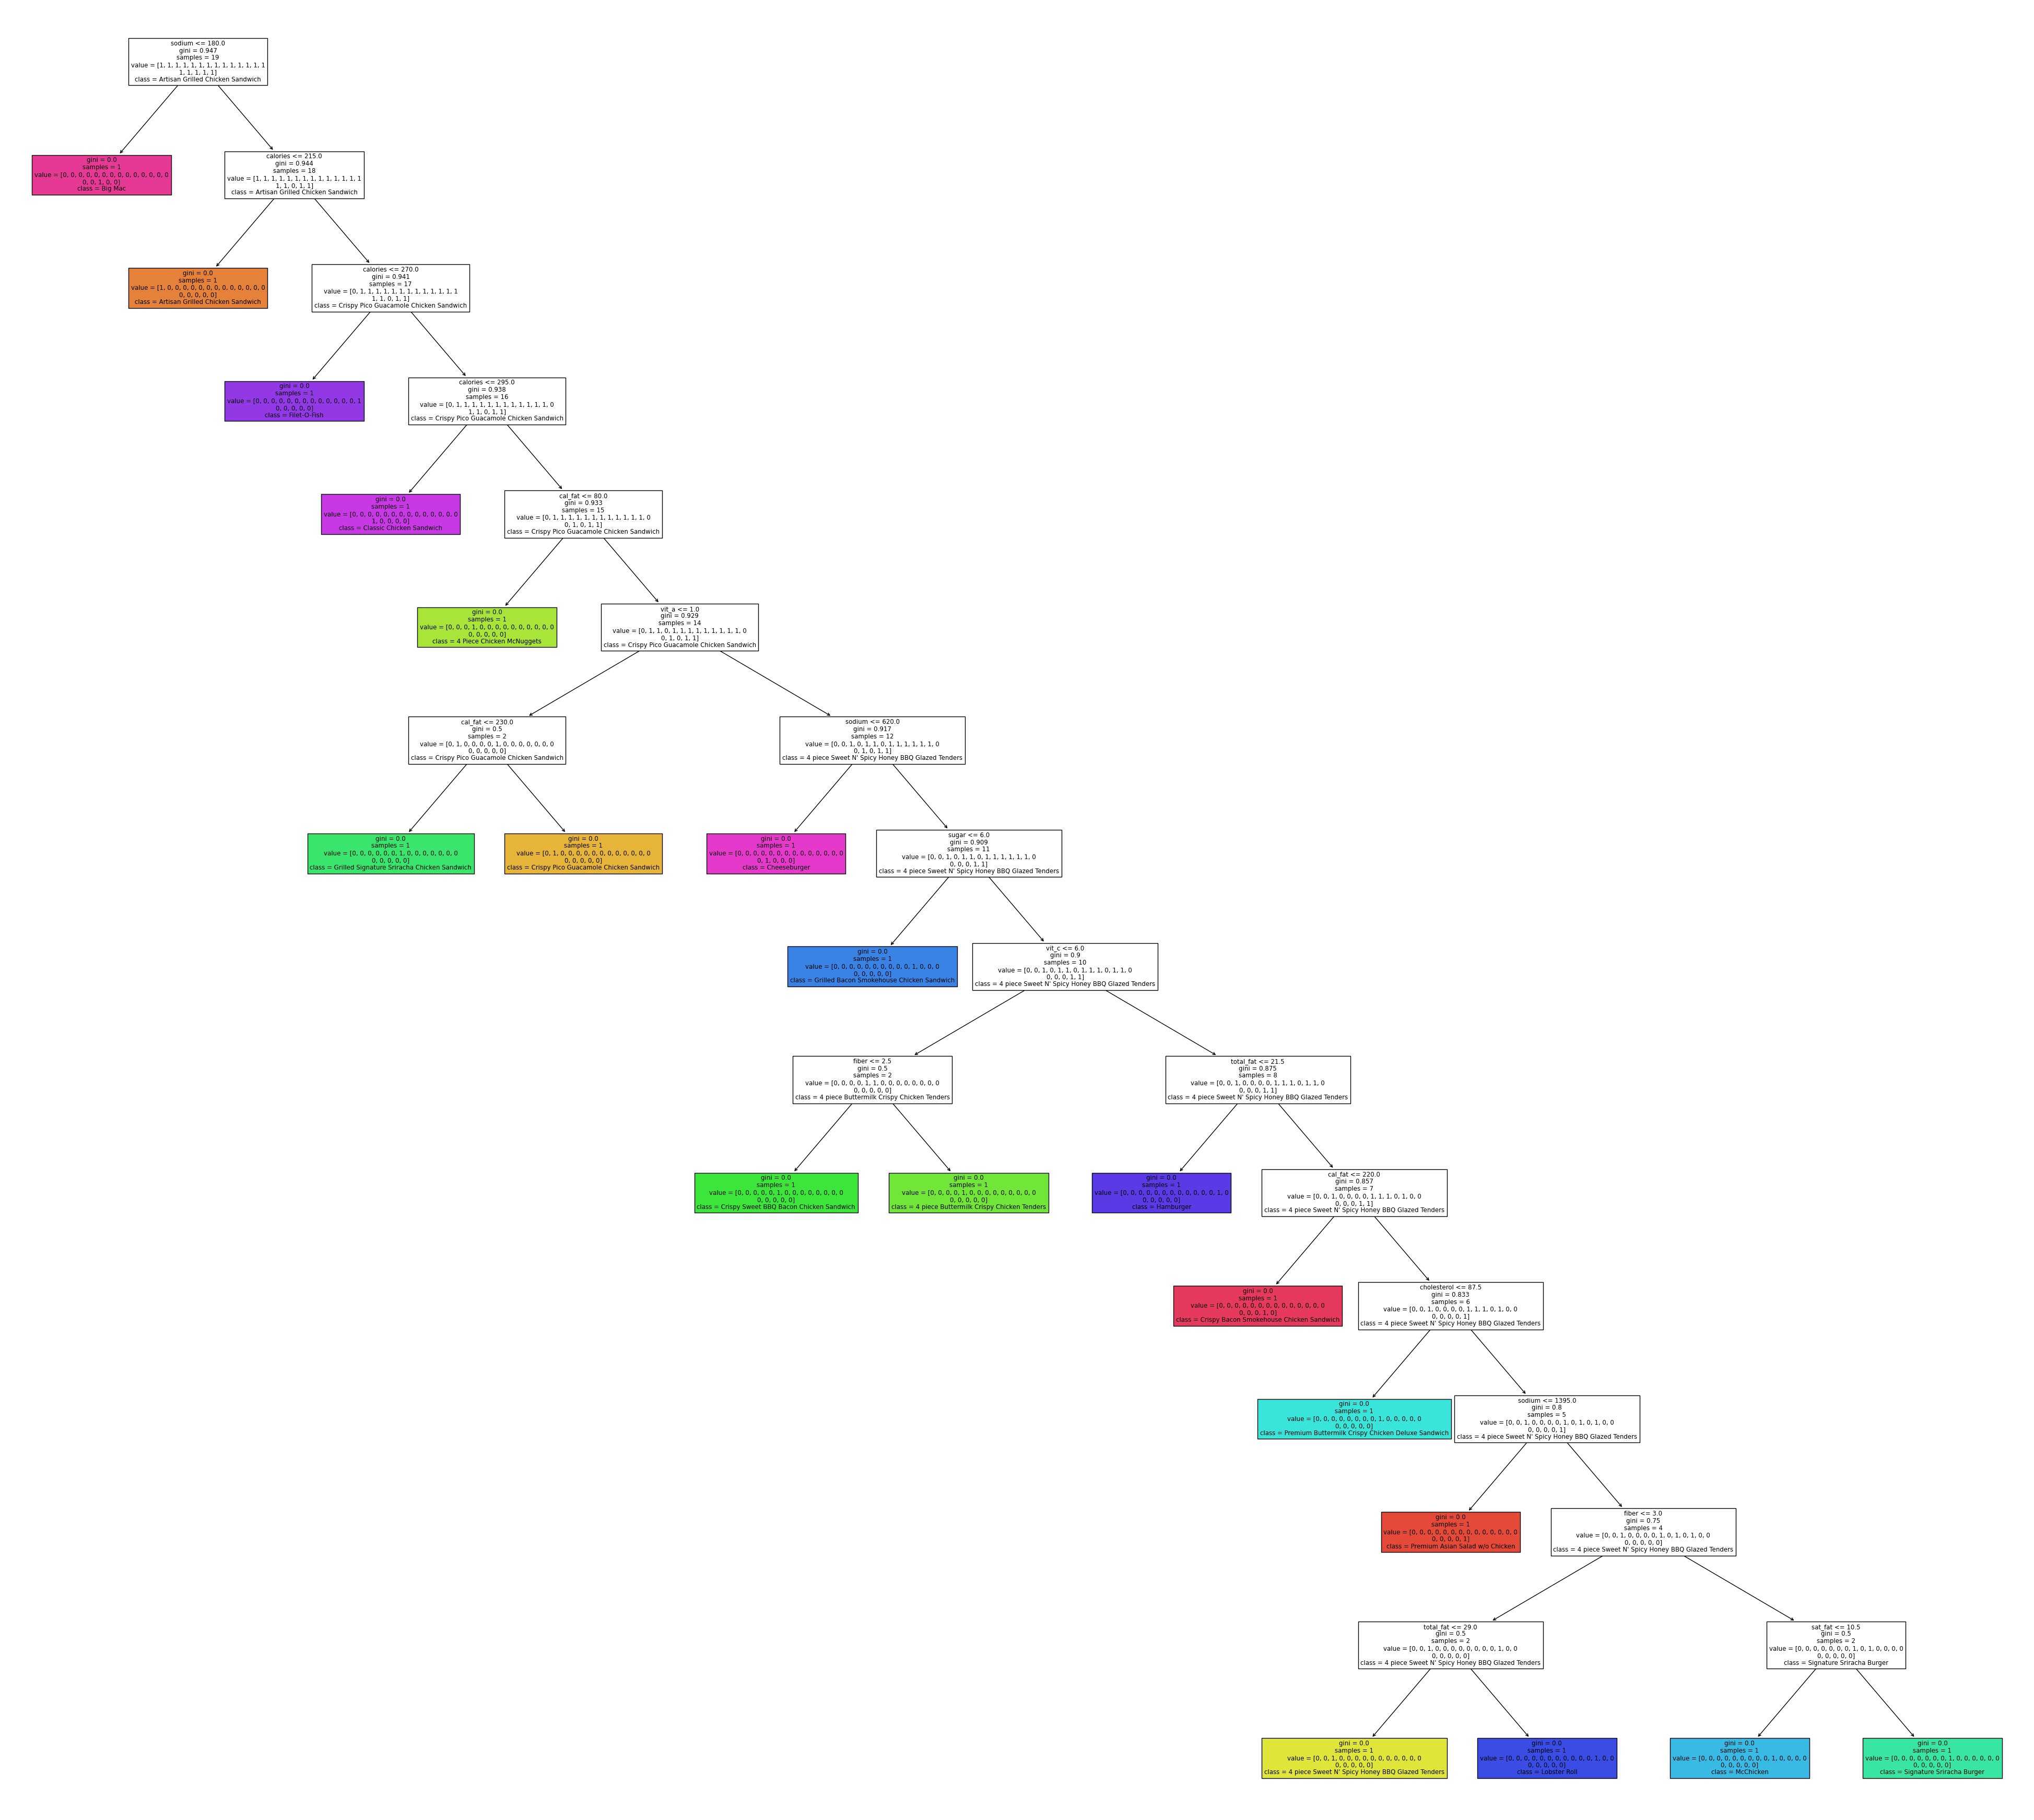

In [16]:
X = mcDf.drop(['item'], axis=1)
Y = mcDf['item']
dt = tree.DecisionTreeClassifier(
    criterion='gini', min_samples_split=2, min_samples_leaf=1, random_state=99)
dtModel = dt.fit(X, Y)
treeRepr = tree.export_text(dtModel)
fig = plt.figure(figsize=(50, 45))
_ = tree.plot_tree(dtModel,
                   feature_names=list(X.columns),
                   class_names=Y.value_counts().index,
                   filled=True)

### Analysis

To identify the most closely related food items, we analyzed the decision tree's leaf nodes. By examining the proximity of food items within these nodes, we determined that those positioned near each other share similar attributes and are likely to be ordered together. The leaf nodes with the lowest Gini index, indicating perfect homogeneity, suggest the strongest relationships. For instance, food items like McChicken and Signature Sriracha Burger are closely related according to the tree's structure, highlighting their similarity in characteristics.